In [1]:
import pandas as pd
from datetime import datetime
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('people.csv')

# Display the first few rows of the DataFrame
df.head()

2024-03-19 01:55:31.481106: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 01:55:31.483686: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 01:55:31.515474: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 01:55:32.102793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,4defE49671cF860,Sydney,Shannon,Male,tvang@example.net,574-440-1423x9799,2020-07-09,Technical brewer
1,2,F89B87bCf8f210b,Regina,Lin,Male,helen14@example.net,001-273-664-2268x90121,1909-06-20,"Teacher, adult education"
2,3,Cad6052BDd5DEaf,Pamela,Blake,Female,brent05@example.org,927-880-5785x85266,1964-08-19,Armed forces operational officer
3,4,e83E46f80f629CD,Dave,Hoffman,Female,munozcraig@example.org,001-147-429-8340x608,2009-02-19,Ship broker
4,5,60AAc4DcaBcE3b6,Ian,Campos,Female,brownevelyn@example.net,166-126-4390,1997-10-02,Media planner


In [2]:
# Assuming 'Date of birth' is in YYYY-MM-DD format
df['Date of birth'] = pd.to_datetime(df['Date of birth'])
df['Age'] = df['Date of birth'].apply(lambda x: datetime.now().year - x.year)

# Creating a new column 'Job_Title_Count' containing the total count of each Job Title
df['Job_Title_Count'] = df.groupby('Job Title')['Job Title'].transform('count')

In [3]:
# Renaming the column 'Job Title' to 'Job_Title'
df = df.rename(columns={'Job Title': 'Job_Title'})
df = df.rename(columns={'Sex': 'Gender'})

In [4]:
# Encoding "Sex" as binary values
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Male will be 1, Female will be 0

In [5]:
# Selecting only needed columns

# Dropping columns except 'Sex', 'Date of birth', and 'Job Title'
df = df[['Gender', 'Job_Title','Age']]

# Renaming the column 'Job Title' to 'Job_Title'
df = df.rename(columns={'Job Title': 'Job_Title'})

df = df.reset_index(drop=True).rename_axis(None, axis=1)

df

,Gender,Job_Title,Age
0,1,Technical brewer,4
1,1,"Teacher, adult education",115
2,0,Armed forces operational officer,60
3,0,Ship broker,15
4,0,Media planner,27
...,...,...,...
1999995,1,Research scientist (maths),111
1999996,0,Marketing executive,47
1999997,1,Photographer,64
1999998,0,Chartered accountant,113


In [6]:
# Creating df1 to optimise NN
df1 = df.copy()

In [7]:

X = df.iloc[:,1:] # selecting all columns except Gender| Dependent variables
y = df.iloc[:,0] # selecting Gender as our target variable | Independent variable

In [8]:
# Encoding "Sex" as binary values
encoder = LabelEncoder()
X['Job_Title'] = encoder.fit_transform(X['Job_Title'])  # Male will be 1, Female will be 0

In [9]:
X

,Job_Title,Age
0,592,4
1,584,115
2,45,60
3,544,15
4,369,27
...,...,...
1999995,508,111
1999996,365,47
1999997,434,64
1999998,86,113


In [10]:
y

0          1
1          1
2          0
3          0
4          0
          ..
1999995    1
1999996    0
1999997    1
1999998    0
1999999    0
Name: Gender, Length: 2000000, dtype: int64

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
model = Sequential()
model.add(Dense(10,input_dim=2,activation='relu')) # First layer
model.add(Dense(10,activation='relu')) # Second layer
model.add(Dense(1,activation='sigmoid'))

/home/hduser/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X, y, epochs=150, batch_size=512, verbose=2)

Epoch 1/150
3907/3907 - 4s - 990us/step - accuracy: 0.5004 - loss: 0.6933
Epoch 2/150
3907/3907 - 4s - 1ms/step - accuracy: 0.4996 - loss: 0.6932
Epoch 3/150
3907/3907 - 3s - 774us/step - accuracy: 0.5005 - loss: 0.6932
Epoch 4/150
3907/3907 - 3s - 762us/step - accuracy: 0.4998 - loss: 0.6932
Epoch 5/150
3907/3907 - 3s - 858us/step - accuracy: 0.5004 - loss: 0.6932
Epoch 6/150
3907/3907 - 4s - 1ms/step - accuracy: 0.5003 - loss: 0.6932
Epoch 7/150
3907/3907 - 6s - 1ms/step - accuracy: 0.5009 - loss: 0.6931
Epoch 8/150
3907/3907 - 3s - 790us/step - accuracy: 0.5003 - loss: 0.6931
Epoch 9/150
3907/3907 - 5s - 1ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 10/150
3907/3907 - 3s - 783us/step - accuracy: 0.4992 - loss: 0.6932
Epoch 11/150
3907/3907 - 5s - 1ms/step - accuracy: 0.5001 - loss: 0.6932
Epoch 12/150
3907/3907 - 3s - 702us/step - accuracy: 0.5003 - loss: 0.6931
Epoch 13/150
3907/3907 - 5s - 1ms/step - accuracy: 0.4998 - loss: 0.6932
Epoch 14/150
3907/3907 - 3s - 804us/step - acc

Epoch 112/150
3907/3907 - 5s - 1ms/step - accuracy: 0.4996 - loss: 0.6932
Epoch 113/150
3907/3907 - 3s - 832us/step - accuracy: 0.5001 - loss: 0.6931
Epoch 114/150
3907/3907 - 3s - 846us/step - accuracy: 0.5003 - loss: 0.6931
Epoch 115/150
3907/3907 - 3s - 886us/step - accuracy: 0.4991 - loss: 0.6931
Epoch 116/150
3907/3907 - 5s - 1ms/step - accuracy: 0.5005 - loss: 0.6931
Epoch 117/150
3907/3907 - 5s - 1ms/step - accuracy: 0.5001 - loss: 0.6931
Epoch 118/150
3907/3907 - 4s - 981us/step - accuracy: 0.5005 - loss: 0.6931
Epoch 119/150
3907/3907 - 5s - 1ms/step - accuracy: 0.4998 - loss: 0.6931
Epoch 120/150
3907/3907 - 3s - 761us/step - accuracy: 0.5002 - loss: 0.6931
Epoch 121/150
3907/3907 - 5s - 1ms/step - accuracy: 0.5002 - loss: 0.6932
Epoch 122/150
3907/3907 - 4s - 970us/step - accuracy: 0.4997 - loss: 0.6931
Epoch 123/150
3907/3907 - 3s - 794us/step - accuracy: 0.4999 - loss: 0.6931
Epoch 124/150
3907/3907 - 4s - 954us/step - accuracy: 0.4999 - loss: 0.6931
Epoch 125/150
3907/390

In [15]:
# Convert history.history dict to a pandas DataFrame
history_df = pd.DataFrame(history.history)

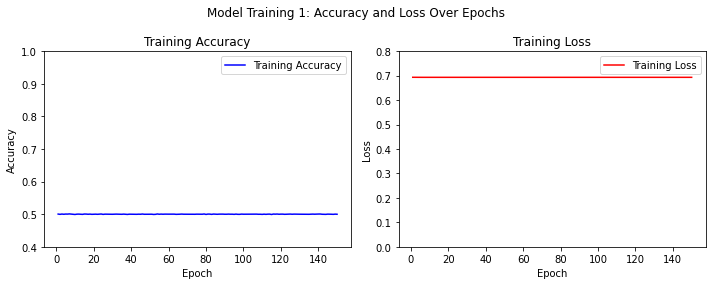

In [21]:
import numpy as np

# Extracting epochs
epochs_range = np.array(range(1, len(history_df) + 1))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
# Convert the Series to a numpy array
plt.plot(epochs_range, history_df['accuracy'].values, label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(.4, 1)  # Set the y-axis limits for accuracy
plt.legend()

plt.suptitle("Model Training 1: Accuracy and Loss Over Epochs")

plt.subplot(1, 2, 2)
# Convert the Series to a numpy array
plt.plot(epochs_range, history_df['loss'].values, label='Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 0.8) # Set the y-axis limits for loss
plt.legend()

plt.tight_layout()
plt.show()

## The NN is clearly not performing well. Let's treat each job as a feature and transpose them into columns, filling each column with the Age.

In [22]:
df1

,Gender,Job_Title,Age
0,1,Technical brewer,4
1,1,"Teacher, adult education",115
2,0,Armed forces operational officer,60
3,0,Ship broker,15
4,0,Media planner,27
...,...,...,...
1999995,1,Research scientist (maths),111
1999996,0,Marketing executive,47
1999997,1,Photographer,64
1999998,0,Chartered accountant,113


In [23]:
# Add a unique identifier for each row within each group of 'Sex' and 'Job_Title'
df1['unique_id'] = df1.groupby(['Gender', 'Job_Title']).cumcount()

# Pivot the table, using 'Sex' and 'unique_id' as the index
df1 = df1.pivot_table(index=['Gender', 'unique_id'], columns='Job_Title', values='Age').reset_index()
df1  = df1.rename_axis(None, axis=1) # Index with no name as it should be

# Drop the 'unique_id' column as it's no longer needed, keeping 'Sex'
df1.drop('unique_id', axis=1, inplace=True)

# Display the result
df1

,Gender,Academic librarian,Accommodation manager,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered management","Accountant, chartered public finance",Accounting technician,Actor,Actuary,...,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer,Youth worker
0,0,3.0,8.0,54.0,40.0,41.0,35.0,100.0,5.0,77.0,...,17.0,21.0,4.0,44.0,96.0,78.0,112.0,3.0,78.0,6.0
1,0,74.0,35.0,40.0,67.0,74.0,55.0,60.0,6.0,34.0,...,19.0,96.0,74.0,52.0,59.0,114.0,100.0,35.0,87.0,76.0
2,0,114.0,86.0,22.0,102.0,86.0,99.0,95.0,118.0,15.0,...,118.0,23.0,52.0,42.0,110.0,45.0,5.0,86.0,15.0,50.0
3,0,25.0,32.0,37.0,44.0,97.0,92.0,110.0,34.0,7.0,...,15.0,45.0,20.0,44.0,84.0,90.0,31.0,54.0,63.0,3.0
4,0,53.0,16.0,60.0,27.0,57.0,60.0,77.0,70.0,40.0,...,65.0,21.0,112.0,64.0,94.0,56.0,83.0,94.0,104.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3385,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3386,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3387,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df1 = df1.dropna()

In [25]:
df1

,Gender,Academic librarian,Accommodation manager,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered management","Accountant, chartered public finance",Accounting technician,Actor,Actuary,...,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer,Youth worker
0,0,3.0,8.0,54.0,40.0,41.0,35.0,100.0,5.0,77.0,...,17.0,21.0,4.0,44.0,96.0,78.0,112.0,3.0,78.0,6.0
1,0,74.0,35.0,40.0,67.0,74.0,55.0,60.0,6.0,34.0,...,19.0,96.0,74.0,52.0,59.0,114.0,100.0,35.0,87.0,76.0
2,0,114.0,86.0,22.0,102.0,86.0,99.0,95.0,118.0,15.0,...,118.0,23.0,52.0,42.0,110.0,45.0,5.0,86.0,15.0,50.0
3,0,25.0,32.0,37.0,44.0,97.0,92.0,110.0,34.0,7.0,...,15.0,45.0,20.0,44.0,84.0,90.0,31.0,54.0,63.0,3.0
4,0,53.0,16.0,60.0,27.0,57.0,60.0,77.0,70.0,40.0,...,65.0,21.0,112.0,64.0,94.0,56.0,83.0,94.0,104.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,1,23.0,38.0,86.0,36.0,6.0,61.0,53.0,70.0,80.0,...,82.0,87.0,72.0,100.0,35.0,18.0,22.0,86.0,71.0,92.0
3134,1,23.0,78.0,43.0,65.0,109.0,33.0,109.0,94.0,76.0,...,93.0,22.0,107.0,25.0,87.0,108.0,16.0,19.0,47.0,81.0
3135,1,18.0,61.0,93.0,33.0,23.0,6.0,104.0,91.0,36.0,...,31.0,81.0,24.0,81.0,112.0,78.0,26.0,43.0,97.0,12.0
3136,1,60.0,59.0,75.0,55.0,3.0,87.0,50.0,71.0,98.0,...,101.0,118.0,103.0,88.0,88.0,18.0,67.0,29.0,22.0,86.0


In [26]:
X = df1.iloc[:,1:] # selecting all columns except Gender | Dependent variable
y = df1.iloc[:,0] # selecting column Gender as our target variable | Independent variable

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
model = Sequential()
model.add(Dense(10,input_dim=639,activation='relu')) # First layer
model.add(Dense(10,activation='relu')) # Second layer
model.add(Dense(1,activation='sigmoid'))

/home/hduser/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile the model
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(X, y, epochs=150, batch_size=512, verbose=2)

Epoch 1/150
6/6 - 1s - 92ms/step - accuracy: 0.4826 - loss: 0.7474
Epoch 2/150
6/6 - 0s - 10ms/step - accuracy: 0.5215 - loss: 0.7106
Epoch 3/150
6/6 - 0s - 9ms/step - accuracy: 0.5562 - loss: 0.6862
Epoch 4/150
6/6 - 0s - 11ms/step - accuracy: 0.5875 - loss: 0.6684
Epoch 5/150
6/6 - 0s - 11ms/step - accuracy: 0.6161 - loss: 0.6528
Epoch 6/150
6/6 - 0s - 10ms/step - accuracy: 0.6474 - loss: 0.6393
Epoch 7/150
6/6 - 0s - 11ms/step - accuracy: 0.6677 - loss: 0.6274
Epoch 8/150
6/6 - 0s - 10ms/step - accuracy: 0.6894 - loss: 0.6158
Epoch 9/150
6/6 - 0s - 10ms/step - accuracy: 0.7093 - loss: 0.6048
Epoch 10/150
6/6 - 0s - 12ms/step - accuracy: 0.7238 - loss: 0.5937
Epoch 11/150
6/6 - 0s - 19ms/step - accuracy: 0.7403 - loss: 0.5828
Epoch 12/150
6/6 - 0s - 10ms/step - accuracy: 0.7520 - loss: 0.5720
Epoch 13/150
6/6 - 0s - 10ms/step - accuracy: 0.7644 - loss: 0.5603
Epoch 14/150
6/6 - 0s - 10ms/step - accuracy: 0.7747 - loss: 0.5476
Epoch 15/150
6/6 - 0s - 9ms/step - accuracy: 0.7840 - loss

6/6 - 0s - 10ms/step - accuracy: 0.9969 - loss: 0.0105
Epoch 123/150
6/6 - 0s - 7ms/step - accuracy: 0.9969 - loss: 0.0103
Epoch 124/150
6/6 - 0s - 9ms/step - accuracy: 0.9969 - loss: 0.0103
Epoch 125/150
6/6 - 0s - 11ms/step - accuracy: 0.9969 - loss: 0.0101
Epoch 126/150
6/6 - 0s - 11ms/step - accuracy: 0.9969 - loss: 0.0100
Epoch 127/150
6/6 - 0s - 10ms/step - accuracy: 0.9969 - loss: 0.0096
Epoch 128/150
6/6 - 0s - 11ms/step - accuracy: 0.9969 - loss: 0.0094
Epoch 129/150
6/6 - 0s - 8ms/step - accuracy: 0.9969 - loss: 0.0095
Epoch 130/150
6/6 - 0s - 7ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 131/150
6/6 - 0s - 8ms/step - accuracy: 0.9969 - loss: 0.0093
Epoch 132/150
6/6 - 0s - 9ms/step - accuracy: 0.9969 - loss: 0.0095
Epoch 133/150
6/6 - 0s - 7ms/step - accuracy: 0.9976 - loss: 0.0089
Epoch 134/150
6/6 - 0s - 8ms/step - accuracy: 0.9976 - loss: 0.0088
Epoch 135/150
6/6 - 0s - 11ms/step - accuracy: 0.9976 - loss: 0.0087
Epoch 136/150
6/6 - 0s - 8ms/step - accuracy: 0.9979 - l

In [31]:
# Converting history into a DataFrame
history_df1 = pd.DataFrame(history.history)

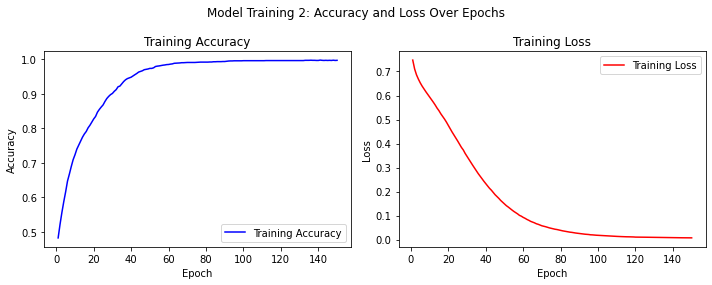

In [34]:
# Extracting epochs
epochs_range = np.array(range(1, len(history_df) + 1))

# Plotting Training Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_df1['accuracy'].values, label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle("Model Training 2: Accuracy and Loss Over Epochs")

# Plotting Training Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_df1['loss'].values, label='Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()